<a href="https://colab.research.google.com/github/subhashreegre/Web-Scraping-/blob/main/Web_Scraping_with_bs4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests

In [3]:
response = requests.get('https://books.toscrape.com/catalogue/page-1.html')

In [4]:
from bs4 import BeautifulSoup

In [5]:
response = response.content

In [6]:
response

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [7]:
bs = BeautifulSoup(response, 'html.parser')

In [8]:
bs


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [9]:
ol = bs.find('ol')

In [10]:
ol

<ol class="row">
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="tipping-th

In [11]:
article = ol.find_all('article', class_= 'product_pod')

In [12]:
article

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache

In [13]:
import pandas as pd

In [14]:
books = []

for j in range(1, 5):
  url = f"https://books.toscrape.com/catalogue/page-{j}.html"
  response = requests.get(url)
  response = response.content
  bs = BeautifulSoup(response, 'html.parser')
  ol = bs.find('ol')
  article = ol.find_all('article', class_= 'product_pod')
  #print(url)
  #print(i)

  for i in article:
    image = i.find('img')
    title = image.attrs['alt']
    #print(title) #book title

    stars = i.find('p')
    stars = stars['class'][1]
    #print(stars) #star-ratings

    price = i.find('p', class_= 'price_color')
    price = price.text[1:]
    price = float(price)
    #print(price) #price-tag

    stock = i.find('p', class_= 'instock availability')
    stock = list(stock)[2]
    #print(stock)
    stock = stock.replace("\n", "")
    stock = stock.replace(" ", "")
    #print(stock) #availability

    books.append([title, stars, price, stock])

In [15]:
df = pd.DataFrame(books, columns = ['Name of the Book', 'Star Ratings', 'Price in $', 'Availability'])

print(df)

                                     Name of the Book Star Ratings  \
0                                A Light in the Attic        Three   
1                                  Tipping the Velvet          One   
2                                          Soumission          One   
3                                       Sharp Objects         Four   
4               Sapiens: A Brief History of Humankind         Five   
..                                                ...          ...   
75                                           Security          Two   
76      Saga, Volume 6 (Saga (Collected Editions) #6)        Three   
77      Saga, Volume 5 (Saga (Collected Editions) #5)          Two   
78  Reskilling America: Learning to Labor in the T...          Two   
79  Rat Queens, Vol. 3: Demons (Rat Queens (Collec...        Three   

    Price in $ Availability  
0        51.77      Instock  
1        53.74      Instock  
2        50.10      Instock  
3        47.82      Instock  
4        

In [16]:
df.to_csv('books.csv')

In [17]:
pd.read_csv('books.csv')

,Unnamed: 0,Name of the Book,Star Ratings,Price in $,Availability
0,0,A Light in the Attic,Three,51.77,Instock
1,1,Tipping the Velvet,One,53.74,Instock
2,2,Soumission,One,50.10,Instock
3,3,Sharp Objects,Four,47.82,Instock
4,4,Sapiens: A Brief History of Humankind,Five,54.23,Instock
...,...,...,...,...,...
75,75,Security,Two,39.25,Instock
76,76,"Saga, Volume 6 (Saga (Collected Editions) #6)",Three,25.02,Instock
77,77,"Saga, Volume 5 (Saga (Collected Editions) #5)",Two,51.04,Instock
78,78,Reskilling America: Learning to Labor in the T...,Two,19.83,Instock


In [18]:
df.shape

(80, 4)

In [19]:
df.dtypes

Name of the Book     object
Star Ratings         object
Price in $          float64
Availability         object
dtype: object

**Data Visualization**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
##df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [22]:
pd.read_csv('books.csv')

,Unnamed: 0,Name of the Book,Star Ratings,Price in $,Availability
0,0,A Light in the Attic,Three,51.77,Instock
1,1,Tipping the Velvet,One,53.74,Instock
2,2,Soumission,One,50.10,Instock
3,3,Sharp Objects,Four,47.82,Instock
4,4,Sapiens: A Brief History of Humankind,Five,54.23,Instock
...,...,...,...,...,...
75,75,Security,Two,39.25,Instock
76,76,"Saga, Volume 6 (Saga (Collected Editions) #6)",Three,25.02,Instock
77,77,"Saga, Volume 5 (Saga (Collected Editions) #5)",Two,51.04,Instock
78,78,Reskilling America: Learning to Labor in the T...,Two,19.83,Instock


In [23]:
count_nan = len(df) - df.count()
print(count_nan)

Name of the Book    0
Star Ratings        0
Price in $          0
Availability        0
dtype: int64


In [24]:
df = df.sort_values('Price in $', ascending=False)

In [25]:
df

,Name of the Book,Star Ratings,Price in $,Availability
68,The Death of Humanity: and the Case for Life,Four,58.11,Instock
40,Slow States of Collapse: Poems,Three,57.31,Instock
15,Our Band Could Be Your Life: Scenes from the A...,Three,57.25,Instock
58,The Past Never Ends,Four,56.50,Instock
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,One,56.41,Instock
...,...,...,...,...
51,Tsubasa: WoRLD CHRoNiCLE 2 (Tsubasa WoRLD CHRo...,One,16.28,Instock
34,Sophie's World,Five,15.94,Instock
47,Untitled Collection: Sabbath Poems 2014,Four,14.27,Instock
10,"Starving Hearts (Triangular Trade Trilogy, #1)",Two,13.99,Instock


<Axes: xlabel='Name of the Book'>

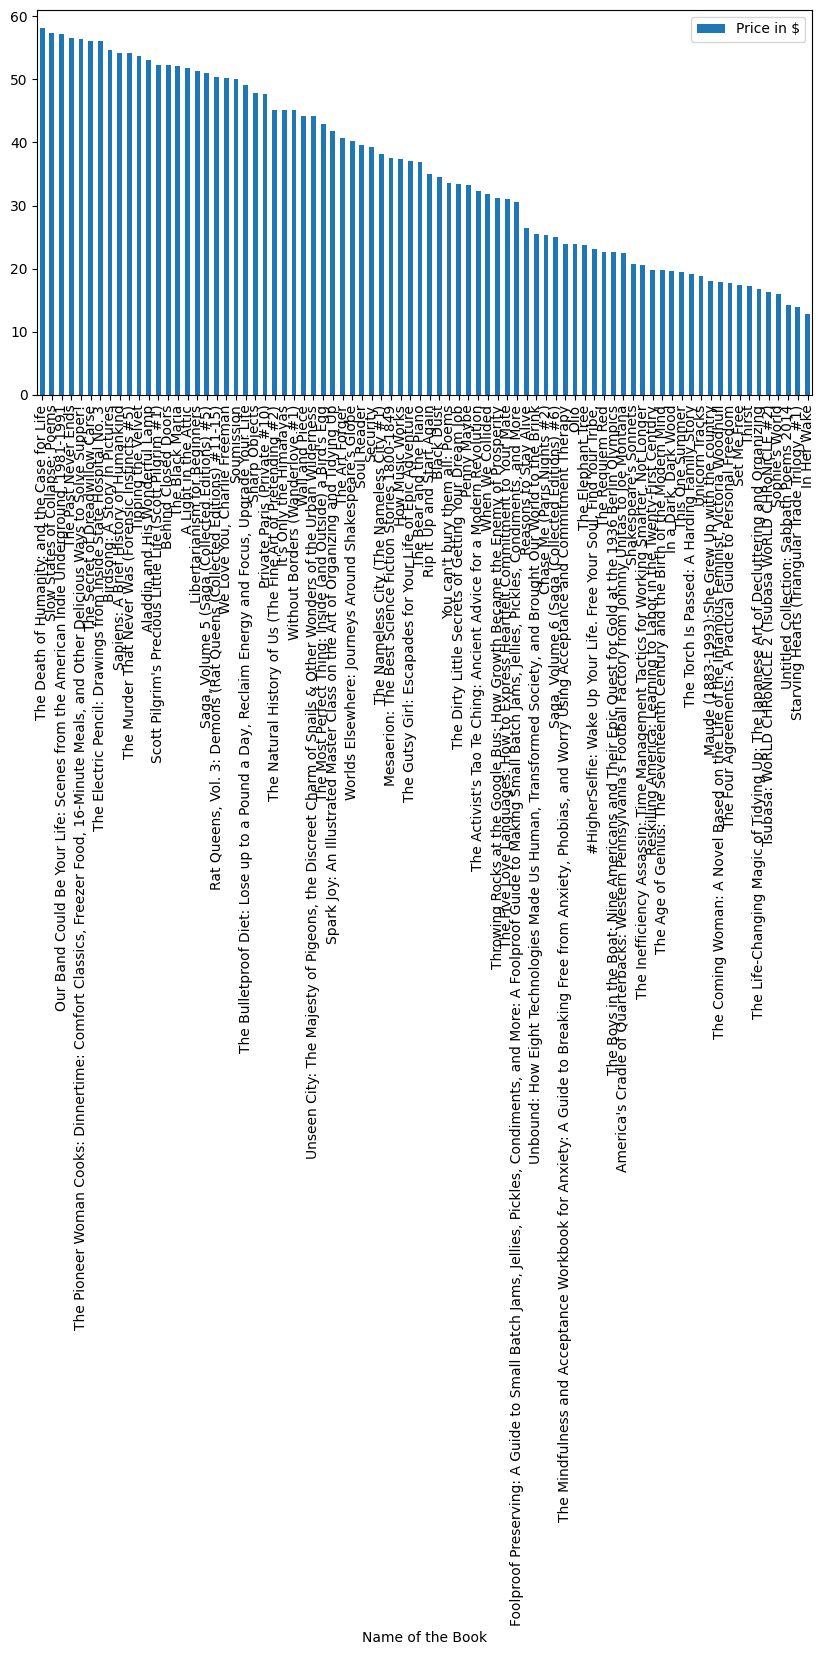

In [26]:
df.plot(x='Name of the Book', y='Price in $',
        kind='bar', figsize=(10, 5), stacked=True)

In [27]:
ratings = df['Star Ratings'].to_list()
#print(ratings)

for i in range(len(ratings)):
  if ratings[i] == 'One':
    ratings[i] = 1
  elif ratings[i] == 'Two':
    ratings[i] = 2
  elif ratings[i] == 'Three':
    ratings[i] = 3
  elif ratings[i] == 'Four':
    ratings[i] = 4
  elif ratings[i] == 'Five':
    ratings[i] = 5

In [28]:
df['Star Ratings'] = ratings

In [29]:
df

,Name of the Book,Star Ratings,Price in $,Availability
68,The Death of Humanity: and the Case for Life,4,58.11,Instock
40,Slow States of Collapse: Poems,3,57.31,Instock
15,Our Band Could Be Your Life: Scenes from the A...,3,57.25,Instock
58,The Past Never Ends,4,56.50,Instock
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,1,56.41,Instock
...,...,...,...,...
51,Tsubasa: WoRLD CHRoNiCLE 2 (Tsubasa WoRLD CHRo...,1,16.28,Instock
34,Sophie's World,5,15.94,Instock
47,Untitled Collection: Sabbath Poems 2014,4,14.27,Instock
10,"Starving Hearts (Triangular Trade Trilogy, #1)",2,13.99,Instock


In [30]:
df = df.sort_values('Star Ratings', ascending=False)

<Axes: xlabel='Name of the Book'>

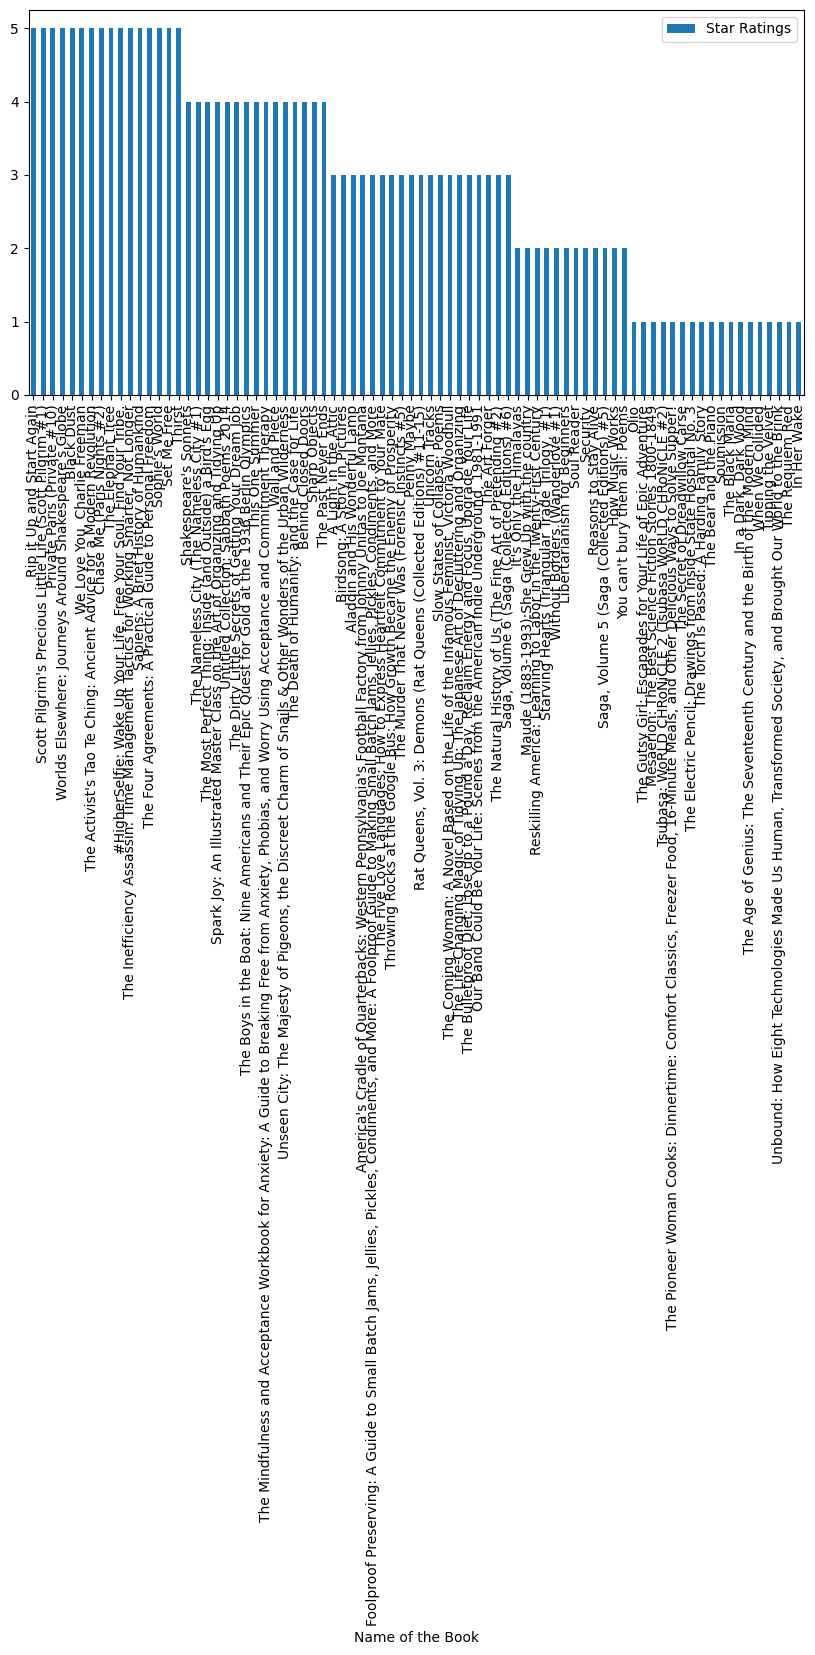

In [31]:
df.plot(x='Name of the Book', y='Star Ratings',
        kind='bar', figsize=(10, 5), stacked=True)

In [32]:
total1 = 0
total2 = 0
total3 = 0
total4 = 0
total5 = 0

total = []
for i in range(len(ratings)):
  if ratings[i] == 1:
    total1 +=1
  elif ratings[i] == 2:
    total2 +=1
  elif ratings[i] == 3:
    total3 +=1
  elif ratings[i] == 4:
    total4 +=1
  elif ratings[i] == 5:
    total5 +=1
total.append([1, 2, 3, 4, 5])
total.append([total1, total2, total3, total4, total5])

In [33]:
total

[[1, 2, 3, 4, 5], [18, 12, 19, 15, 16]]

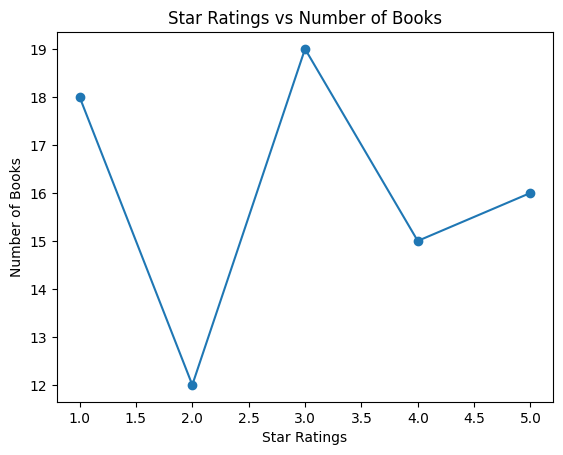

In [34]:
plt.plot(total[0], total[1], marker='o')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Books')
plt.title('Star Ratings vs Number of Books')
plt.show()

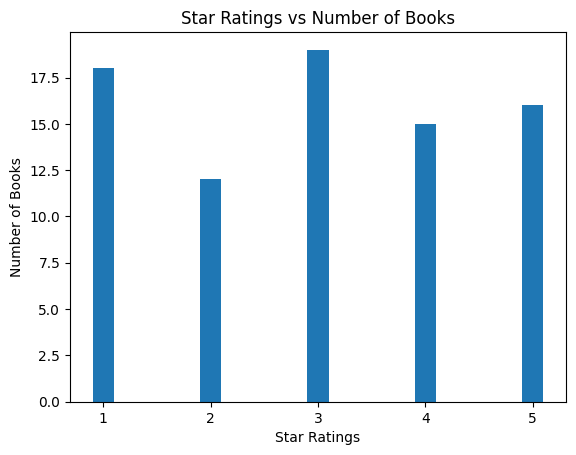

In [35]:
plt.bar(total[0], total[1], width = 0.2)
plt.xlabel('Star Ratings')
plt.ylabel('Number of Books')
plt.title('Star Ratings vs Number of Books')
plt.show()

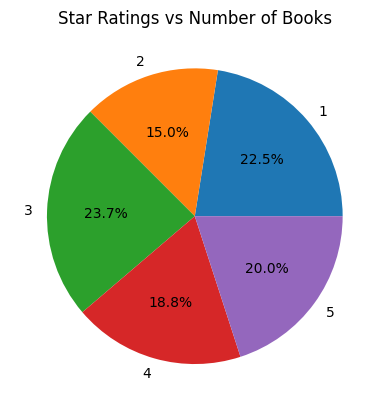

In [37]:
plt.pie(total[1], labels=total[0], autopct='%1.1f%%')
plt.title('Star Ratings vs Number of Books')
plt.show()